# week-6 Task

Fraud detection using SOM


# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Reading the dataset

In [3]:
data=pd.read_csv(r'C:\Users\yadav\Downloads\Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Creating dependent and indepedent variable

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values 

Data preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

installing minisom

In [6]:
!pip install minisom


  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8608 sha256=143f91e46f08daaccbf758736b1ba206f54c0c3d26b6fb2290f2b24c3e813eed
  Stored in directory: c:\users\yadav\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built minisom


In [7]:

from minisom import MiniSom

In [8]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [9]:
som.random_weights_init(X)

Training the SOM on X

In [10]:
som.train_random(data=X, num_iteration=100)

Visualizing the data

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

In [12]:
plt.figure(figsize = (20,10))
# Step 4.1 - initializing the figure (the window having the map)
bone()

<Figure size 1440x720 with 0 Axes>

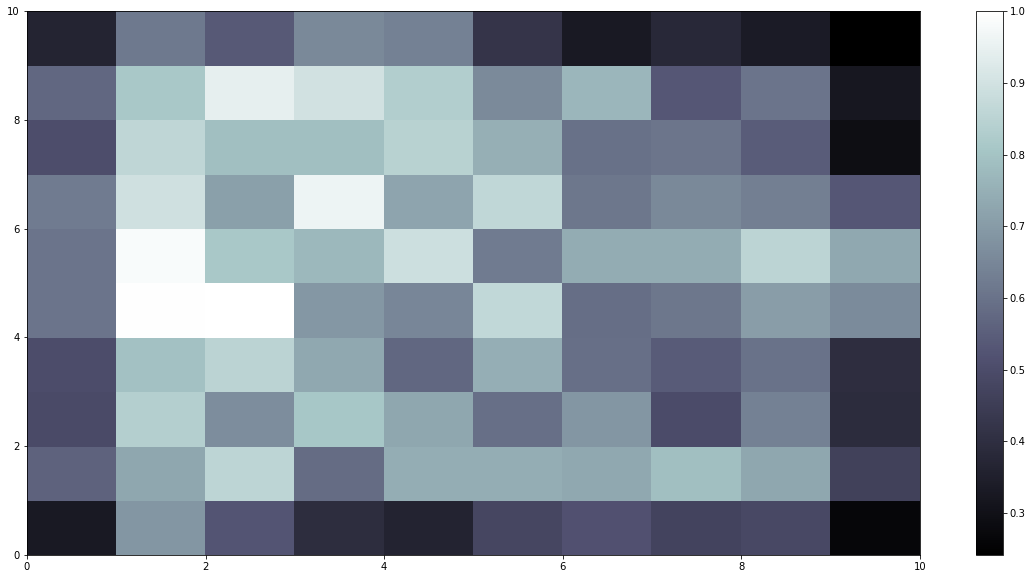

In [13]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()

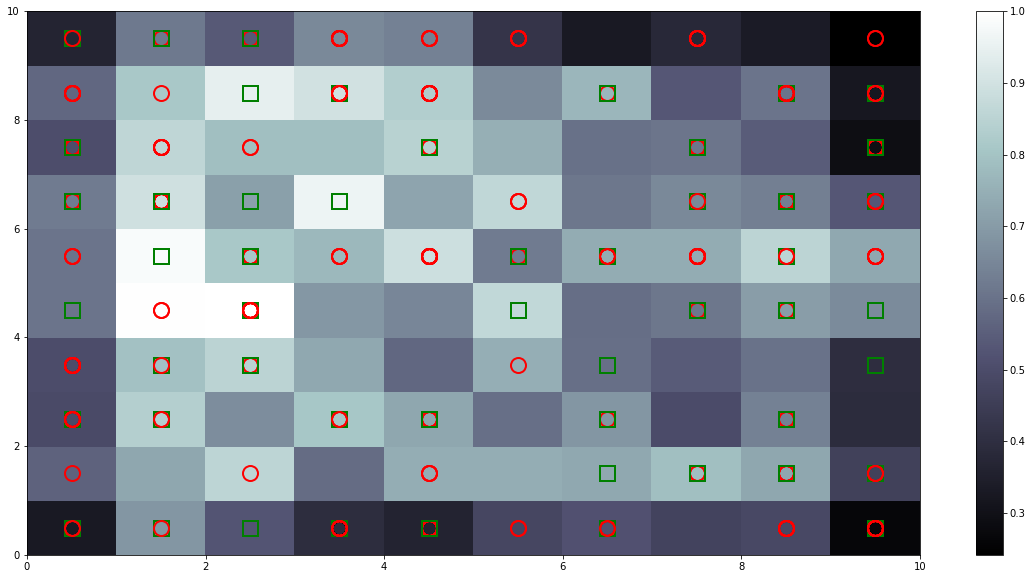

In [14]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['red', 'green']
for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize=15,
                markeredgewidth = 2)  
    
show()


In [25]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(7,
              9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
                     0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.59042402, 1. 

In [26]:
frauds = np.concatenate((mappings[(1, 2)], mappings[(6, 8)]), axis = 0)

In [27]:
frauds = sc.inverse_transform(frauds)
df_frauds = pd.DataFrame(frauds)

In [28]:
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15668679.0,0.0,47.42,3.000,2.0,14.0,4.0,13.875,1.0,1.0,2.0,1.0,2.0,519.0,1705.0
1,15738487.0,0.0,20.75,10.250,2.0,11.0,4.0,0.710,1.0,1.0,2.0,1.0,2.0,49.0,1.0
2,15773421.0,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0,51.0
3,15682686.0,0.0,31.25,3.750,2.0,13.0,8.0,0.625,1.0,1.0,9.0,1.0,2.0,181.0,1.0
4,15621244.0,0.0,18.92,9.250,1.0,8.0,4.0,1.000,1.0,1.0,4.0,1.0,2.0,80.0,501.0
5,15636521.0,0.0,23.50,9.000,2.0,11.0,4.0,8.500,1.0,1.0,5.0,1.0,2.0,120.0,1.0
6,15707602.0,0.0,22.83,2.290,2.0,11.0,8.0,2.290,1.0,1.0,7.0,1.0,2.0,140.0,2385.0
7,15815095.0,0.0,22.58,10.750,2.0,11.0,4.0,0.415,1.0,1.0,5.0,1.0,2.0,0.0,561.0
8,15720725.0,0.0,23.42,0.790,1.0,11.0,4.0,1.500,1.0,1.0,2.0,1.0,2.0,80.0,401.0
9,15567834.0,0.0,30.00,5.290,2.0,10.0,2.0,2.250,1.0,1.0,5.0,1.0,2.0,99.0,501.0


In [29]:
customers = data.iloc[:,1:].values
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [30]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [31]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)
y_pred = classifier.predict(customers)
y_pred = np.concatenate((data.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.9406
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.9449
Epoch 3/5
690/690 [==============================] - 1s 923us/step - loss: 0.2453 - accuracy: 0.9449
Epoch 4/5
690/690 [==============================] - 1s 907us/step - loss: 0.2428 - accuracy: 0.9449
Epoch 5/5
690/690 [==============================] - 1s 941us/step - loss: 0.2341 - accuracy: 0.9449


In [32]:
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df

,Customers,Fraud_probability
0,15605872.0,0.000566
1,15706762.0,0.003284
2,15593345.0,0.004532
3,15580579.0,0.005682
4,15788215.0,0.008242
...,...,...
685,15598802.0,0.373965
686,15568819.0,0.373965
687,15597536.0,0.373965
688,15646190.0,0.373965
